## Exercise

This exercise is designed to help you understand frequentist and Bayesian hypothesis testing.
Note: I adapted it from an exercise that accompanies Simon Vaughan's book [Scientific Inference](http://www.star.le.ac.uk/~sav2/stats.html), which is a great introduction to the various concepts discussed in the lecture and beyond.


In [228]:
%matplotlib notebook
import matplotlib.pyplot as plt

import numpy as np

###  Stellar Clusters

Imagine you have measured the metallicity of stars in two different stellar clusters:

In [229]:
s1 = [1.06, 1.02, 0.873, 0.929, 0.949, 0.852, 1.07]
s2 = [1.01, 1.02, 1.04, 1.02, 1.08, 1.18, 1.12]

These two stellar clusters seem to be quite close to each other (both in angular and radial distance). We'd like to know whether those two stellar clusters originate in the same star formation episode (i.e. they have the same metallicity). Answer the questions below, and discuss them with your group or neighbours. 

Hint: In frequentist statistics, the [2-sample t-test](https://en.wikipedia.org/wiki/Student%27s_t-test) allows the computation of a statistic that is sensitive to the means of the two samples.

1. Compute the value of the 2-sample t-test, as well as the p-value for the statistic of the observations. What is its value? Would you consider it significant? Why? 
2. Find out the conditions under which the 2-sample t-test is appropriate to use. Do you think they are appropriate here?
3. Have you now, in fact, computed the probability that the two star clusters have the same star formation history? Why (not)? Can you think of other ways you could achieve a low p-value?
4. If you add more data points (with similar values as those above) do your conclusions change? Test this by simulating more data points (either from distributions with the same mean or distributions with different means). How many data points do you need to find a $3\sigma$ p-value that they are different?
5. Simulate star clusters like those above from the null hypothesis (both have the same mean value) and compute their p-value 10000 times. Plot a histogram of the resulting p-values. What do you observe? What does this imply for your hypothesis tests?

6. How would you approach this problem from a Bayesian perspective?

Hint: You can consider the hypothesis that the data came either from a Gaussian with the same mean or different means.
Hint: You can assume that we know the two stellar clusters are somewhere in the solar neighbourhood. Try out different priors (including some unlikely ones) and see how the model responds. Is the choice of prior important for this problem?


## Solutions

##### 1. Compute the p-value of the t-statistic. What is its value? Would you consider it significant? Why?

The Student t-statistic is implemented in `scipy.stats`:

In [3]:
import scipy.stats

In [4]:
scipy.stats.ttest_ind(s1, s2)

Ttest_indResult(statistic=-2.5089363889298166, pvalue=0.0274613724999173)

The value of the statistic is about $-2.5$, and the p-value of that statistic under the assumption that the statistic is distributed following a Student t-distribution is $0.027$. 

Is this significant? Well, that depends both on the conventions of your field, and the context of your problem. In many medical analyses and social sciences, the significance threshold is set at $0.05$. In this case, the result would be considered significant and the null hypothesis ("the two samples have the same mean") would be rejected. In astronomy and particle physics, scientists tend to express significance in terms of "sigma", i.e. how much of the distribution is outside the boundaries set by $x$ standard deviations. For example, particle physics uses $5\sigma$ as a significance threshold, corresponding to a p-value of $0.00000573303$, whereas astronomers often use $3\sigma$, corresponding to a p-value $0.002699796$. But this is only convention! There is fundamentally no absolutely correct way to specify a significance threshold: the decision depends on your tolerance for making mistakes when using this to make decisions. There are two ways you could make mistakes: (1) you could be rejecting the null hypothesis it is true, or (2) you could be accepting the null hypothesis when in fact it is not true. How tolerant you are to either of these depends on your specific problem. For example, if your null hypothesis is "Person A does not have cancer", then you might wish to err on the side of rejecting it a few times more often (on the basis that someone having undetected cancer would be much worse than incorrectly diagnosing someone with cancer when they don't have it.

In the present case, let's use the standard convention of astronomers (be sure to specify this *before* you actually do your test!). Therefore, we cannot reject the null hypothesis (the two samples come from distributions with a common mean). 

##### 2. Find out the conditions under which the 2-sample t-test is appropriate to use. Do you think they are appropriate here?

The two-sample t-test requires certain conditions to be true
- both samples must be sampled from a normal distribution 
- the normal distribution for each sample must have the same variance (but could have different means)
- the data sets should be sampled *indepedently* from the distributions to be compared (i.e. data points should be independent of each other!)

In many cases, it is hard to assure that those conditions are fulfilled.
There are several ways to assess whether these are true. One way is to look at plots of the data (for example histograms) for an intuitive assessment. There are also statistical tests to assess for example normality (you can run a Shapiro-Wilk test that the data is normally distributed) and equal variance (for example [Bartlett's test](https://en.wikipedia.org/wiki/Bartlett%27s_test)). Note also that [Welch's t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test) is insensitive to different variances of the two samples. As above, all of these tests have their own assumptions associated with them, so be careful with conclusions drawn from them, too.

Let's use a Kolmogorov-Smirnov test to assess for normality for both samples. Again, this is implemented in `scipy.stats`:

In [5]:
print(scipy.stats.shapiro(s1))
print(scipy.stats.shapiro(s2))

(0.919472336769104, 0.4653036296367645)
(0.867232084274292, 0.17552773654460907)


The p-values derived ($0.46$ and $0.17$) imply that we cannot reject the null hypothesis (the data is normally distributed), so we'll run with it.

Similarly, we can run Bartlett's test to test for similar variances:

In [6]:
scipy.stats.bartlett(s1, s2)

BartlettResult(statistic=0.56044824977373786, pvalue=0.45407969230139722)

Again, the p-value is fairly large ($0.45$), therefore we cannot reject the null hypothesis of equal variance. 

Note, however, that many of these tests are *not* independent of sample size: for a small sample size, the null hypothesis is generally harder to reject (because we have fewer points to base it on). 

##### 3. Have you now, in fact, computed the probability that the two star clusters have the same star formation history? Why (not)? Can you think of other ways you could achieve a low p-value?

No. Frequentist inference does not assign probabilities to hypotheses, just statistics. What we have computed is the probability of finding a value of the test statistic $T$ as large or larger than the observed value if the datasets come from two normal distributions with equal mean and variance. This is a slightly philosophical term, but important. The test statistic is, in this sense, a proxy for the hypothesis we are interested in. However, we can never attach probabilities to the hypotheses of interest directly (here $H_0=$"The data sets come from Gaussians with the same mean" and $H_1=$"The data sets come from Gaussians with different means"). 
All we are allowed to say is that under the assumptions made by the test, and with a given threshold for significance, we cannot reject the hypothesis that the test statistic was produced by two samples with equal means. The interpretation of this is left up to the user. 

If any of the assumptions do not actually apply to the data, then the test statistic will not be well-defined with respect to the hypothesis to be tested. We can no longer guarantee that the test statistic will behave in the way it does if the assumptions are true. For example, the distribution comparing against (here a Student t-distribution) may no longer be known (leading to incorrect p-values). 

##### 4. If you add more data points (with similar values as those above) do your conclusions change? Test this by simulating more data points (either from distributions with the same mean or distributions with different means). How many data points do you need to find a $3\sigma$ p-value that they are different?

Let's simulate the case where the two stellar populations have (slightly) different metallicities. We're going to simulate from two normal distributions with slightly different means ($0.95$ and $1.05$) and the same variance ($0.05$). You can simply use the normal distribution implemented in `numpy.random`: 

In [87]:
n = 7 # number of samples in each; as a bove
mean1 = 0.97
mean2 = 1.03
variance = 0.07

s1_test = np.random.normal(loc=mean1, scale=variance, size=n)
s2_test = np.random.normal(loc=mean2, scale=variance, size=n)

In [88]:
print(s1_test)
print(s2_test)

[ 1.01852399  0.95183618  0.9293294   0.96012584  0.97834779  1.07442375
  0.91574604]
[ 1.00453443  1.13256272  0.99187967  1.0505633   1.02288437  1.03245233
  0.96389984]


Let's compute the t-test statistic and its p-value of that:

In [89]:
scipy.stats.ttest_ind(s1_test, s2_test)

Ttest_indResult(statistic=-1.8178296684844764, pvalue=0.094126116896408929)

Now let's compute the p-value for different numbers of $n$ and then plot it:

In [90]:
n_test = np.array([7, 10, 15, 20, 30, 50, 75, 100, 200, 500, 1000, 5000, 10000])
pvals = np.zeros_like(n_test)

In [91]:
n_test = np.array([7, 10, 15, 20, 30, 50, 75, 100, 200, 500, 1000, 5000, 10000])
pvals = np.zeros(len(n_test))
for i,n in enumerate(n_test):
    s1_test = np.random.normal(loc=mean1, scale=variance, size=n)
    s2_test = np.random.normal(loc=mean2, scale=variance, size=n)

    res = scipy.stats.ttest_ind(s1_test, s2_test)
    pvals[i] = res.pvalue


In [95]:
n_test

array([    7,    10,    15,    20,    30,    50,    75,   100,   200,
         500,  1000,  5000, 10000])

In [92]:
pvals

array([  9.77710865e-02,   8.64011690e-01,   2.14975397e-03,
         5.69740216e-02,   6.89915186e-05,   2.95906433e-06,
         2.96578350e-09,   1.33906038e-08,   1.15496179e-20,
         4.39224248e-29,   4.45113136e-79,   0.00000000e+00,
         0.00000000e+00])

<IPython.core.display.Javascript object>


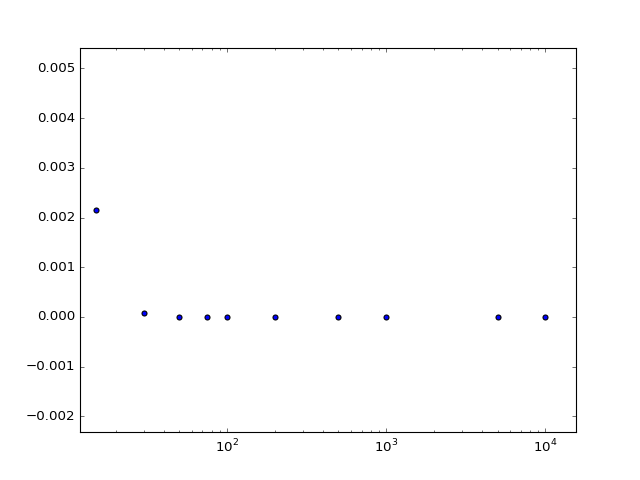

In [93]:
plt.figure()
plt.scatter(n_test, pvals)
plt.xscale("log")

As we get more samples, we are getting more confident that we can reject the null hypothesis. Here, we need about 15 samples in each data set to get to roughly a $3\sigma$ level. Note, however, that this is not exact! One way to assess this would be to simulate every case many times and then look at the distributions of p-values.

Note, however, that the decrease in p-value is *not* monotonous! Why is that? We're actually going to answer this in the next question!

##### 5. Simulate star clusters like those above from the null hypothesis (both have the same mean value) and compute their p-value 10000 times. Plot a histogram of the resulting p-values. What do you observe? What does this imply for your hypothesis tests?

Let's simulate as above, but with only `mean1`:


In [96]:
n = 7 # reset the number of samples

nsims = 10000 # number of simulations

pvals = np.zeros(nsims) # empty array for the p-values

for j in range(nsims):
    s1 = np.random.normal(mean1, variance, size=n)
    s2 = np.random.normal(mean1, variance, size=n)
    
    res = scipy.stats.ttest_ind(s1, s2)
    pvals[j] = res.pvalue

<IPython.core.display.Javascript object>


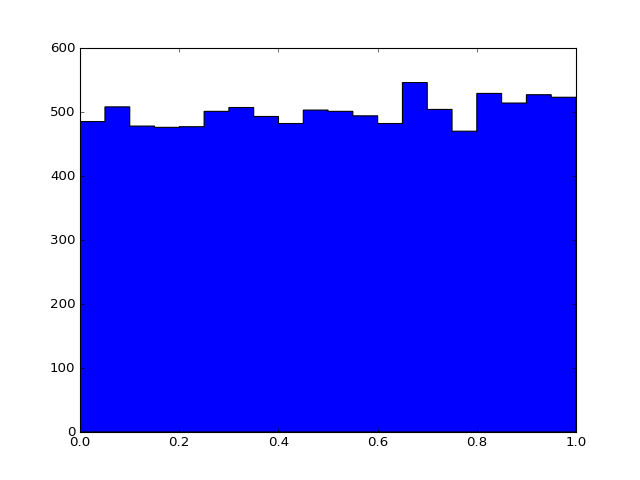

In [98]:
plt.figure()
plt.hist(pvals, bins=20, histtype="stepfilled");

Note how the distribution is uniform! That is, even when we *know* the null hypothesis is true, there will be a fraction of data sets that produce small p-values *purely by chance*. But remember that this is by design: a significance threshold of $0.05$ only means that if the null hypothesis is true, then 5% of the time we will reject it purely by chance. 

This also explains why the plot of p-value versus number of samples is not monotonous: sometimes, the p-value for small samples under the null hypothesis might be small, or conversely, sometimes the p-value of small samples if the null hypothesis is false might be large. 

##### 6. How would you approach this problem from a Bayesian perspective?
Hint: You can consider the hypothesis that the data came either from a Gaussian with the same mean or different means.

In Bayesian inference, we can make this into a model comparison problem. Let's fix the variance and assume we know it to be $0.005$. We now have two models: one with a Gaussian likelihood and a single (constant) parameter $\mu_1$, and one with a Gaussian likelihood and two different parameters $\mu_1$ and $\mu_2$.

This model is fairly easy to write down because we know which star belongs to which cluster. If we did not, it would be much harder. In this case, it is called a [Gaussian Mixture Model](https://en.wikipedia.org/wiki/Mixture_model), which is often used in Machine Learning for classification.

In [180]:
n = 7
variance = 0.005

def single_gaussian_loglikelihood(mu1):
    # Note: mu1 is a list with 1 element
    # let's concatenate both data sets into one
    s = np.hstack([s1, s2])
    nreal = len(s) # the number of data points in the data set
    # this is the logarithm of a likelihood for normally distributed data
    loglike = -0.5*nreal*np.log(2.*np.pi*variance) - 0.5*np.sum((s - mu1[0])**2. / (2.*variance))
    return loglike

This model has just one parameter. Let's plot the values of the likelihood for different values of $\mu_1$:

In [181]:
mu_test = [0.5, 0.6, 0.7, 0.8, 0.9, 0.92, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 
          1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.08, 1.2, 1.3, 1.4, 1.5]

loglike_test1 = np.zeros_like(mu_test)

for i,mu in enumerate(mu_test):
    loglike_test1[i] = single_gaussian_loglikelihood([mu])

<IPython.core.display.Javascript object>


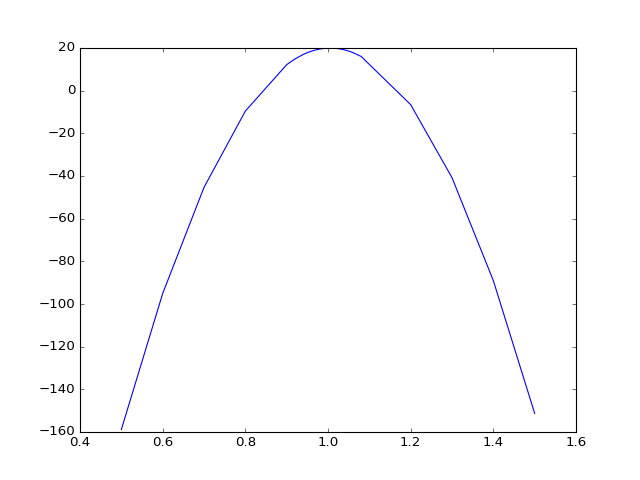

In [182]:
plt.figure()
plt.plot(mu_test, loglike_test1)

Where's the maximum of that distribution?

In [183]:
max_loglike1 = np.where(loglike_test1 == np.max(loglike_test1))[0][0]
print(max_loglike1)
print("The maximum is at " + str(mu_test[max_loglike1]))

13
The maximum is at 1.01


Let's write down the likelihood for the second model:

In [185]:
def double_gaussian_loglikelihood(mu):
    # note: mu is a list of 2 parameters 
    # This likelihood is easy because we know which star belongs to 
    # which cluster. If it didn't, this problem would be much harder
    
    loglike1 = -0.5*n*np.log(2*np.pi*variance) - 0.5*np.sum((s1 - mu[0])**2. / (2.*variance))
    loglike2 = -0.5*n*np.log(2*np.pi*variance) - 0.5*np.sum((s2 - mu[1])**2. / (2.*variance))

    return loglike1+loglike2
    

We now have two parameters, so we are going to calculate a grid:

In [186]:
loglike_test2 = np.zeros((len(mu_test), len(mu_test)))
for i,mu1 in enumerate(mu_test):
    for j, mu2 in enumerate(mu_test):
        loglike_test2[i,j] = double_gaussian_loglikelihood([mu1, mu2])

In [187]:
loglike_test2

array([[ -1.58849466e+02,  -1.25504629e+02,  -9.91597918e+01,
         -7.98149549e+01,  -6.74701179e+01,  -6.58411506e+01,
         -6.44921832e+01,  -6.39226995e+01,  -6.34232158e+01,
         -6.29937321e+01,  -6.26342484e+01,  -6.23447647e+01,
         -6.21252810e+01,  -6.19757973e+01,  -6.18963136e+01,
         -6.18868299e+01,  -6.19473462e+01,  -6.20778625e+01,
         -6.22783788e+01,  -6.28894115e+01,  -7.24356071e+01,
         -8.80907702e+01,  -1.10745933e+02,  -1.40401096e+02],
       [ -1.28436411e+02,  -9.50915737e+01,  -6.87467368e+01,
         -4.94018998e+01,  -3.70570629e+01,  -3.54280955e+01,
         -3.40791281e+01,  -3.35096444e+01,  -3.30101607e+01,
         -3.25806770e+01,  -3.22211934e+01,  -3.19317097e+01,
         -3.17122260e+01,  -3.15627423e+01,  -3.14832586e+01,
         -3.14737749e+01,  -3.15342912e+01,  -3.16648075e+01,
         -3.18653238e+01,  -3.24763564e+01,  -4.20225521e+01,
         -5.76777152e+01,  -8.03328782e+01,  -1.09988041e+02],
      

Where is the maximum?

In [188]:
max_loglike2 = np.where(loglike_test2 == np.max(loglike_test2))
max_loglike2 = np.array([max_loglike2[0][0], max_loglike2[1][0]])

In [189]:
mu_test[max_loglike2[0]]

0.98

In [190]:
mu_test[max_loglike2[1]]

1.03

<IPython.core.display.Javascript object>


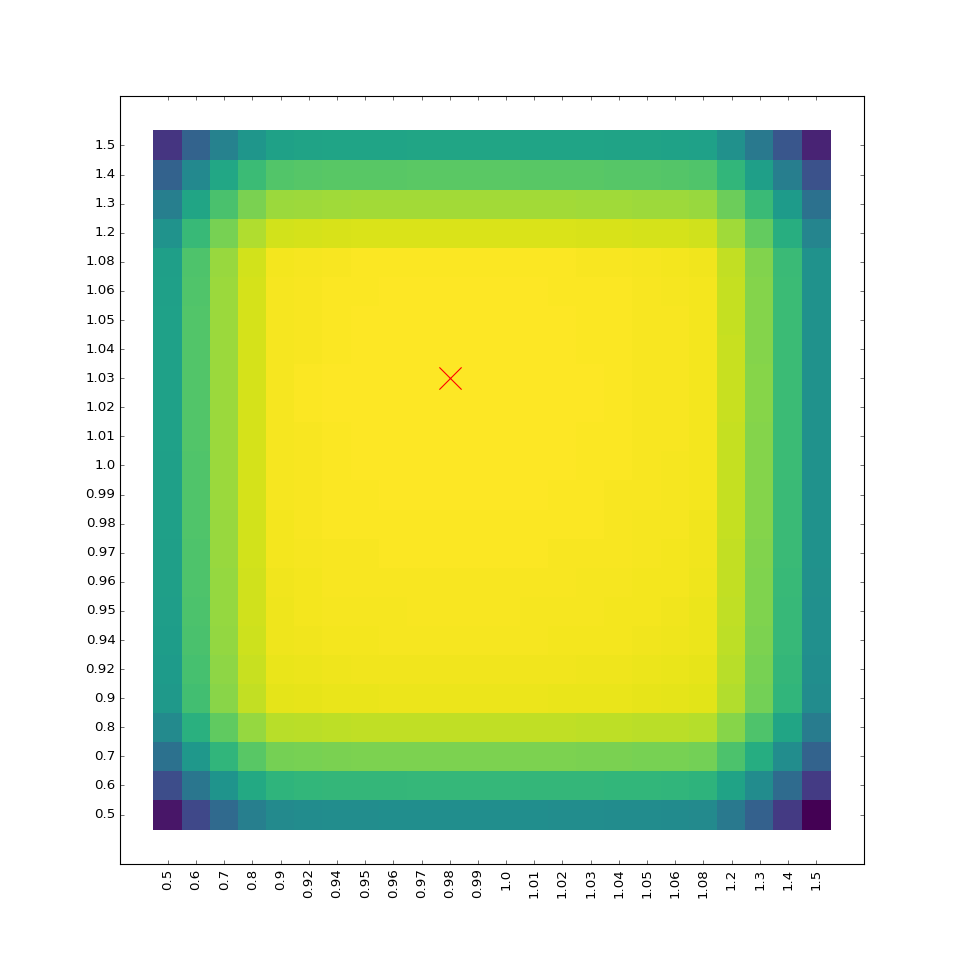

In [196]:
import matplotlib.cm as cmap
plt.figure(figsize=(12,12))

plt.pcolormesh(loglike_test2.T, cmap=cmap.viridis, 
            vmin=np.min(loglike_test2), vmax=np.max(loglike_test2))
plt.xticks(np.arange(loglike_test2.shape[0])+0.5,
           mu_test, rotation=90)
plt.yticks(np.arange(loglike_test2.shape[1])+0.5,
           mu_test)

plt.scatter(*max_val+0.5, s=400, c='red', marker='x')


It looks like we're finding the right values. But note that we only do that because we actually had the correct values for $\mu_1$ and $\mu_2$ in our grid!

Let's compare the likelihoods:

In [192]:
loglike_test1[max_loglike1]

19.945783379780288

In [193]:
max_loglike2

array([10, 15])

In [194]:
loglike_test2[max_loglike2[0], max_loglike2[1]]

20.255834255228237

Note that while not much larger, the likelihood of the two-parameter model is larger than the likelihood of the model with a single parameter. This is always true: more parameters will always give you a larger likelihood, because a model with more parameters can always fit the data better, since it is more flexible (but you might end up *overfitting* you data!). This means that the likelihood by itself is not a great tool to use for model comparison. 

So far, we have not actually done anything Bayesian. For that, we'll need to define priors. We are going to be boring and define normal priors for our problem. Our assumption that the stellar clusters are somewhere in the solar neighbourhood imply that we know the metallicities can't be too dissimilar from those of the sun. So we're going to use a normally distributed prior with a mean of $\mu_p=1$ and a standard deviation of $\sigma_p = 0.05$. These parameters are also called *hyperparameters*. In some cases, you can try to infer those, too, as part of your model. But we're not going to do that here.

Okay, let's set up our two posteriors:

In [210]:
n = 7 # number of data points
variance = 0.005 # variance of the data


def single_gaussian_logposterior(mu):
    
    prior = scipy.stats.norm(loc=1.0, scale=0.05)
    
    logprior = prior.logpdf(mu[0])
    loglike = single_gaussian_loglikelihood(mu)
    
    return logprior + loglike


Now let's repeat our exercise with plotting the posterior instead of the likelihood:

In [211]:
mu_test = [0.5, 0.6, 0.7, 0.8, 0.9, 0.92, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 
          1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.08, 1.2, 1.3, 1.4, 1.5]

logpost_test1 = np.zeros_like(mu_test)

for i,mu in enumerate(mu_test):
    logpost_test1[i] = single_gaussian_logposterior([mu])

<IPython.core.display.Javascript object>


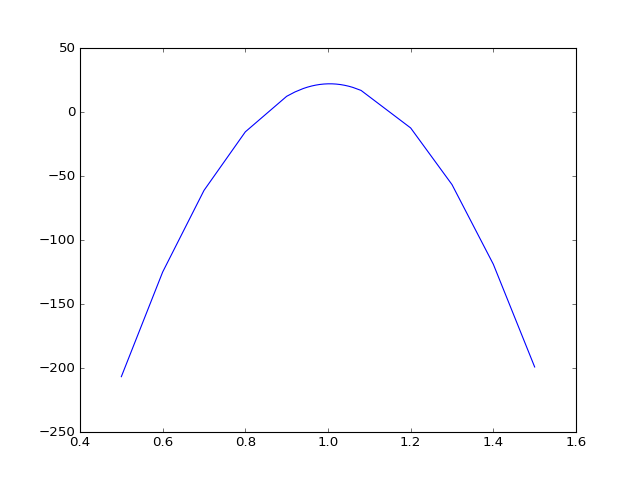

In [212]:
plt.figure()
plt.plot(mu_test, logpost_test1)

That doesn't look too different! We shouldn't be surprised, however, since our prior is really similar to our likelihood. Let's instead choose a prior that makes no sense. Let's move the mean of our prior distribution to $0.1$ and make the distribution really narrow:

In [213]:
def single_gaussian_logposterior_nonsense_prior(mu):
    
    prior = scipy.stats.norm(loc=0.1, scale=0.01)
    
    logprior = prior.logpdf(mu[0])
    loglike = single_gaussian_loglikelihood(mu)
    
    return logprior + loglike


In [214]:
mu_test = [0.5, 0.6, 0.7, 0.8, 0.9, 0.92, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 
          1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.08, 1.2, 1.3, 1.4, 1.5]

logpost_nonsense_test1 = np.zeros_like(mu_test)

for i,mu in enumerate(mu_test):
    logpost_nonsense_test1[i] = single_gaussian_logposterior_nonsense_prior([mu])

<IPython.core.display.Javascript object>


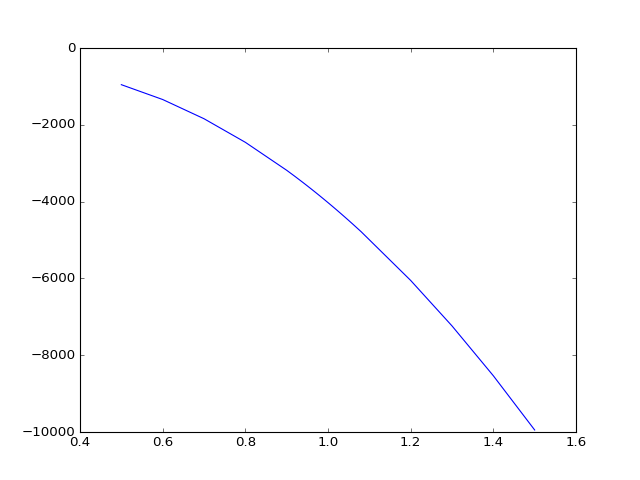

In [215]:
plt.figure()
plt.plot(mu_test, logpost_nonsense_test1)

Notice how choosing a different prior has changed the posterior dramatically! This is because our prior knowledge tells us we're *really* certain the metallicity is around $0.1$, but the data tries to tell us otherwise. However, there are only a few data points, therefore they aren't really informative enough to convince us the prior is wrong.
It seems like the small number of data points makes us sensitive to the prior choice.

Let's also define the posterior for the second model:

In [216]:
def double_gaussian_logposterior(mu):
    
    prior = scipy.stats.norm(loc=1.0, scale=0.05)
    
    logprior1 = prior.logpdf(mu[0])
    logprior2 = prior.logpdf(mu[1])
    
    loglike = single_gaussian_loglikelihood(mu)
    
    return logprior1 + logprior2 + loglike



In [217]:
logpost_test2 = np.zeros((len(mu_test), len(mu_test)))
for i,mu1 in enumerate(mu_test):
    for j, mu2 in enumerate(mu_test):
        logpost_test2[i,j] = double_gaussian_logposterior([mu1, mu2])

In [224]:
print(np.max(logpost_test2))

maxind = np.where(logpost_test2 == np.max(logpost_test2))
print(mu_test[maxind[0][0]])
print(mu_test[maxind[1][0]])

max_val = np.array([mu_test[maxind[0][0]], mu_test[maxind[1][0]]])

24.0935816634
1.0
1.0


In [225]:
max_val

array([ 1.,  1.])

<IPython.core.display.Javascript object>


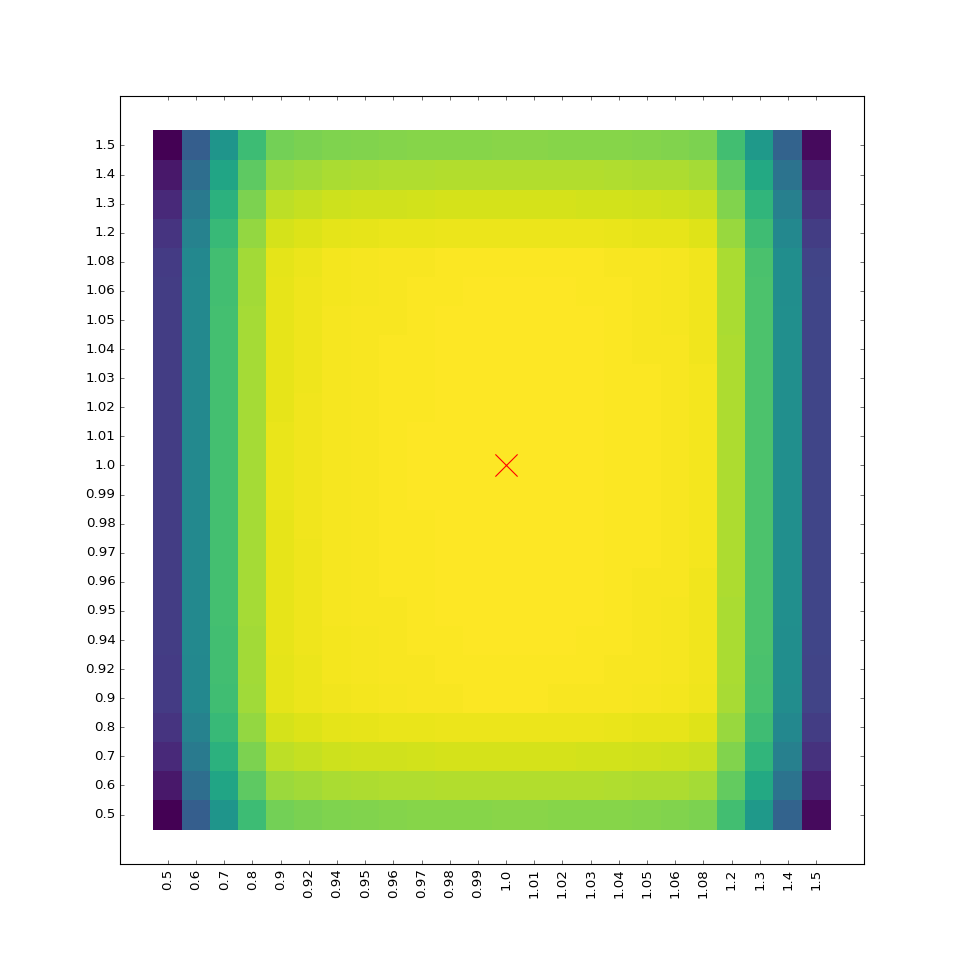

In [227]:
import matplotlib.cm as cmap
plt.figure(figsize=(12,12))

plt.pcolormesh(logpost_test2.T, cmap=cmap.viridis, 
            vmin=np.min(logpost_test2), vmax=np.max(logpost_test2))
plt.xticks(np.arange(logpost_test2.shape[0])+0.5,
           mu_test, rotation=90)
plt.yticks(np.arange(logpost_test2.shape[1])+0.5,
           mu_test)

plt.scatter(maxind[0][0]+0.5, maxind[1][0]+0.5, s=400, c='red', marker='x')



The prior we've chosen has changed our conclusions from our previous likelihood-based model. Because we have few data points, the posterior now has a maximum at $1$ for each parameter. 

Where do we go from here? Well, in the next step, you'd have to
* put priors on both models (one Gaussian versus two Gaussians)
* compute the marginalized likelihood or evidence of each model (by integrating over the parameters)
* compute the posterior odds of both models.

In general, this integral will be hard to compute. In this case with one or two parameters, you should be able to get away by calculating the posterior over a reasonably fine grid and then compute the Riemann sums for each model to approximate the integral. 